In [1]:
#| echo: false
from IPython.display import display, HTML
HTML('<style>.output {flex-direction: row;}</style>')

## 데이터 분석의 과정

![](images/process.png){width=500 fig-align="center"} <br />
source: [R for Data Science](https://r4ds.had.co.nz/explore-intro.html)


- Transform (데이터 변형)
    - 데이터의 변수들 중 일부를 선택하기
    - 필요한 부분를 필터링하기
    - 기존의 변수들로 새로운 변수 만들기
    - 요약자료를 계산하기
- Visualise (시각화)
    - 시각화를 통해 데이터가 품고 있는 정보를 파악하여 데이터에 대한 이해를 높임
- Model (모형)
    - 시각화와 데이터 변형의 두 가지를 병행하면서 호기심과 의구심을 갖고 연구자가 자신의 관심사에 답을 구하는 탐색적 분석을 하는 과정
    - 이 과정에서 모형을 세우고 데이터를 얼마나 잘 설명하는지를 살펴보고, 모형을 수정해 나가는 과정을 거침

## First steps

In [2]:
#| code-fold: true
#| code-summary: Load packages

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

# statistics
import statsmodels.api as sm

Data: *Fuel economy data from 1999 to 2008 for 38 popular models of cars* \
[description](https://vincentarelbundock.github.io/Rdatasets/doc/ggplot2/mpg.html){link-external-newwindow}


In [3]:
# Fuel economy data from 1999 to 2008 for 38 popular models of cars
mpg = sm.datasets.get_rdataset("mpg", "ggplot2").data
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


  
  
Q: 엔진의 크기(displ)와 연비(hwy)는 어떤 관계에 있는가?

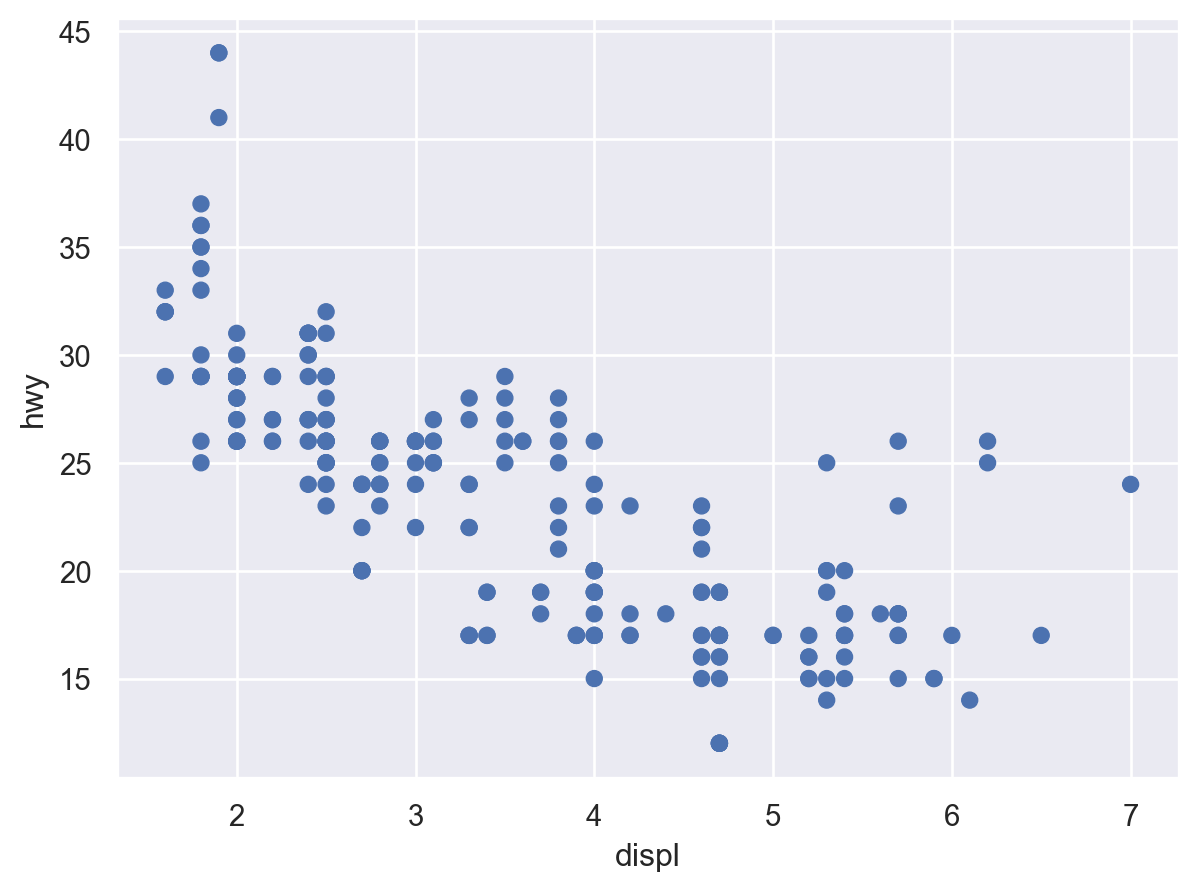

In [4]:
(
    so.Plot(mpg, x="displ", y="hwy") # empty plot을 생성하고, x, y축에 mapping할 mpg 데이터의 변수를 지정
    .add(so.Dot()) # layer를 추가하여, points들을 Dot이라는 mark object를 써서 표현
)

::: {.callout-important}

***Layer-specific mappings***

다음과 같이 첫번째 layer 안에서 x, y를 mapping하는 경우, 이후 새로 추가되는 layer에는 그 mapping이 적용되지 않음

```
(
    so.Plot(mpg)
    .add(so.Dot(), x="displ", y="hwy") # 이 layer에서만 mapping이 유효
)
```

:::

::: {.callout-tip}

다음과 같이 x, y를 생략하거나 간략히 할 수 있으나...

```
so.Plot(mpg, "displ", "hwy").add(so.Dot())
```

:::

#### 카테고리 변수인 경우

- cyl (실린더 개수), hwy (고속도로 연비)의 관계를 scatterplot으로 살펴볼 수 있는가? (left)
- class (차량 타입), drv (전륜 구동, 후륜 구동, 4륜 구동 타입)의 관계는 어떠한가? (right)

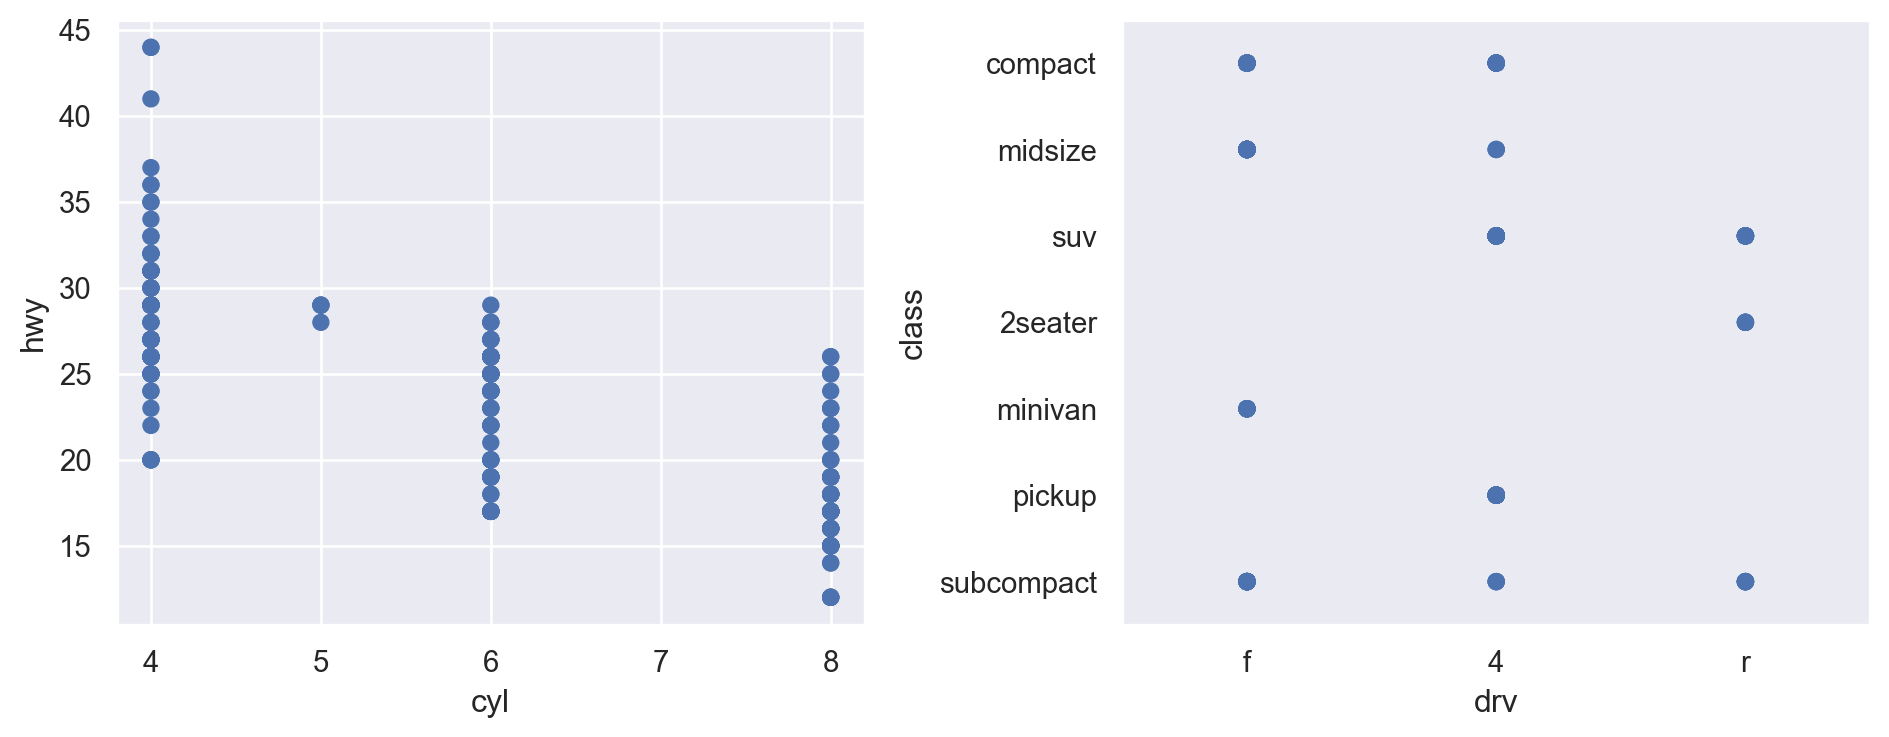

In [31]:
#| echo: false

(
    so.Plot(mpg)
    .pair(
        x=["cyl", "drv"],
        y=["hwy", "class"],
        cross=False,
    )
    .add(so.Dot())
    .layout(size=(10, 4))
)

## Aesthetic mappings

Q: 엔진의 크기와 연비와의 관계에서 보이는 트렌드 라인에서 심하게 벗어난 것이 있는가?

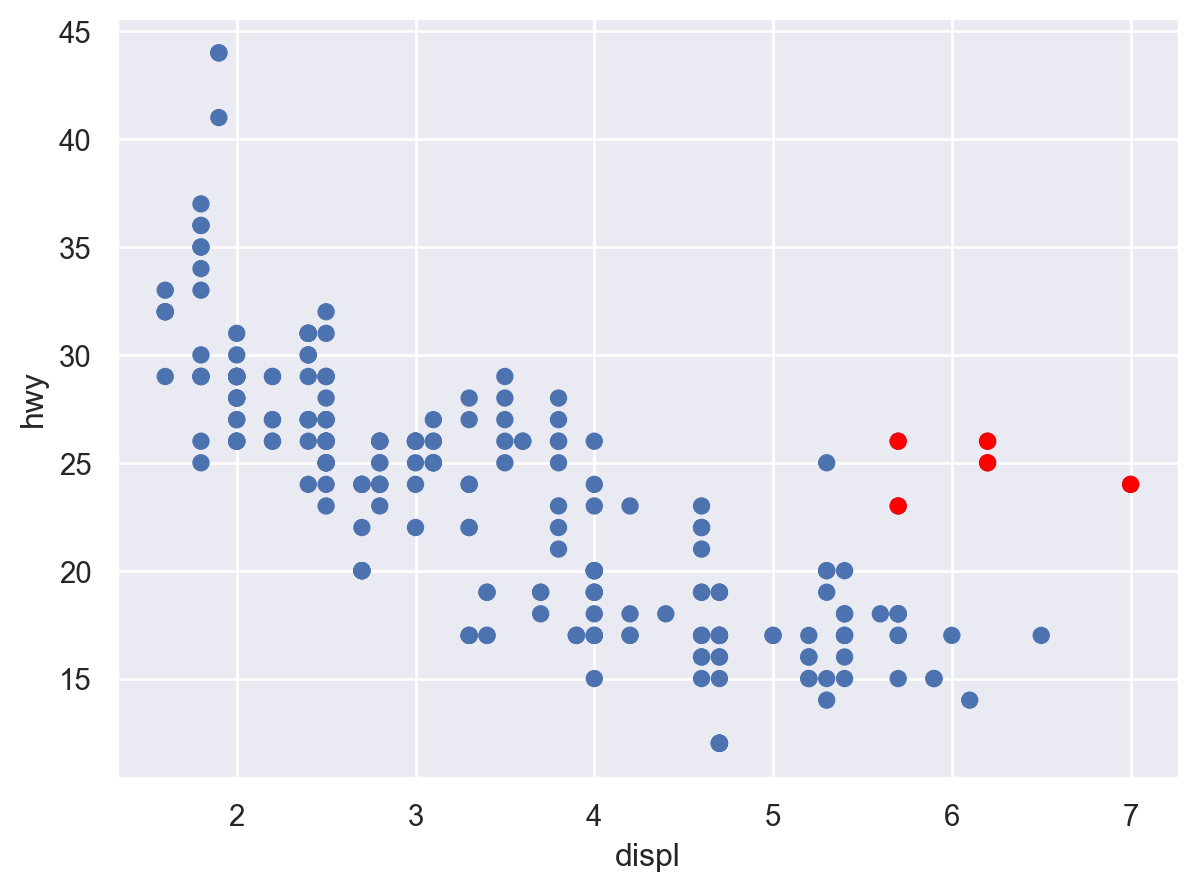

In [6]:
#| echo: false

mpg_2seater = mpg[mpg['class'] == "2seater"]

(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot())
    .add(so.Dot(color="red"), x=mpg_2seater.displ, y=mpg_2seater.hwy)
)


<br />
변수들을 x, y라는 position에 mapping하는 것에 추가하여 다음과 같은 속성(aesthetic)에 mapping할 수 있음

**색(color), 크기(pointsize), 모양(marker), 선 종류(linestyle), 투명도(alpha)**

![](images/aesthetics.png){width=400}

### Color

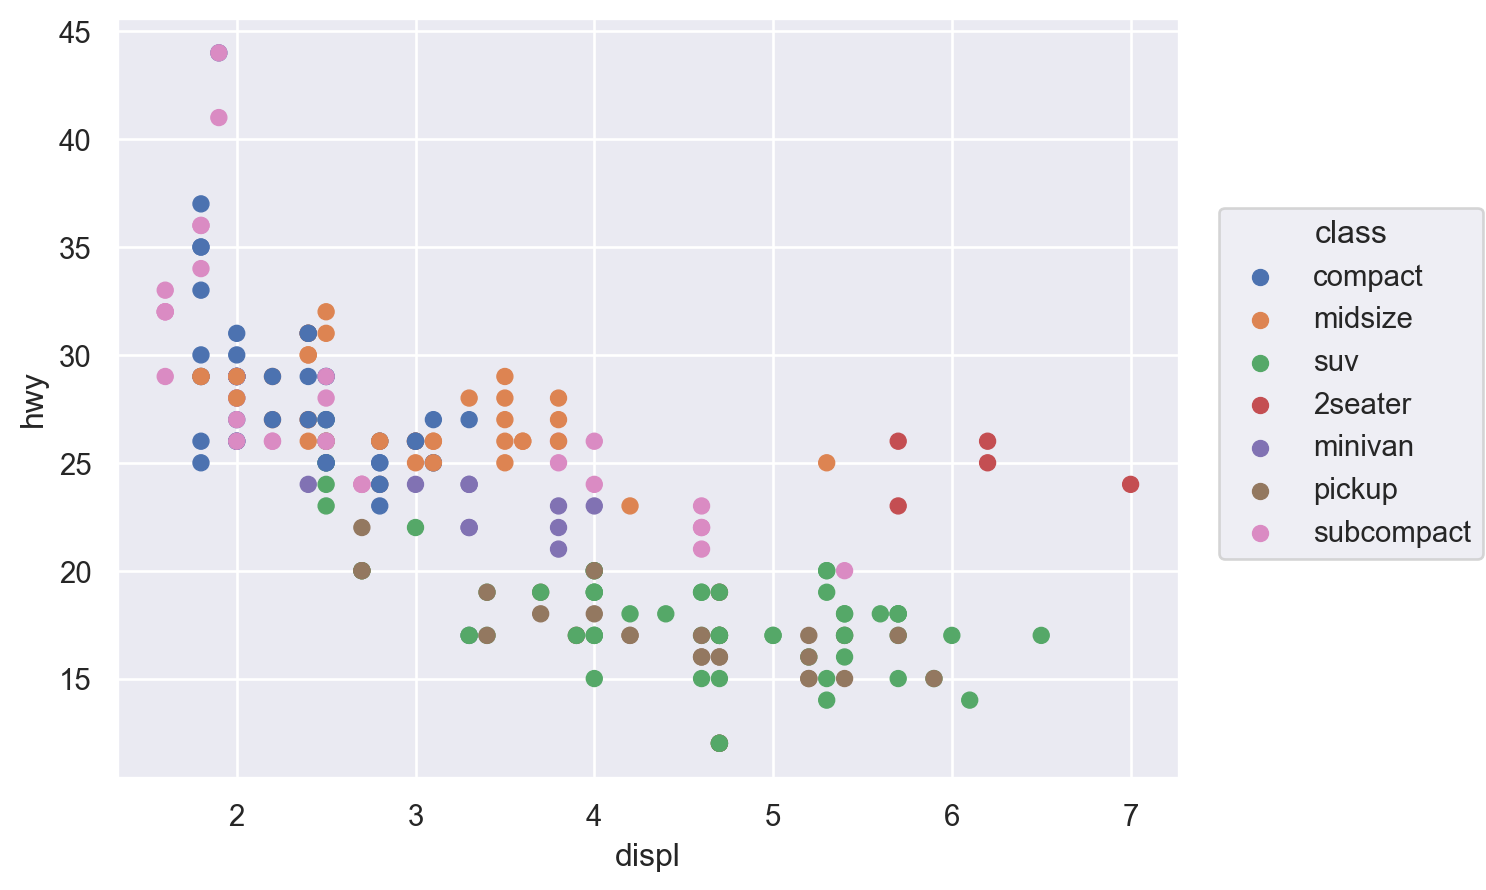

In [7]:
(
    so.Plot(mpg, x="displ", y="hwy", color="class")
    .add(so.Dot())
)

### Pointsize

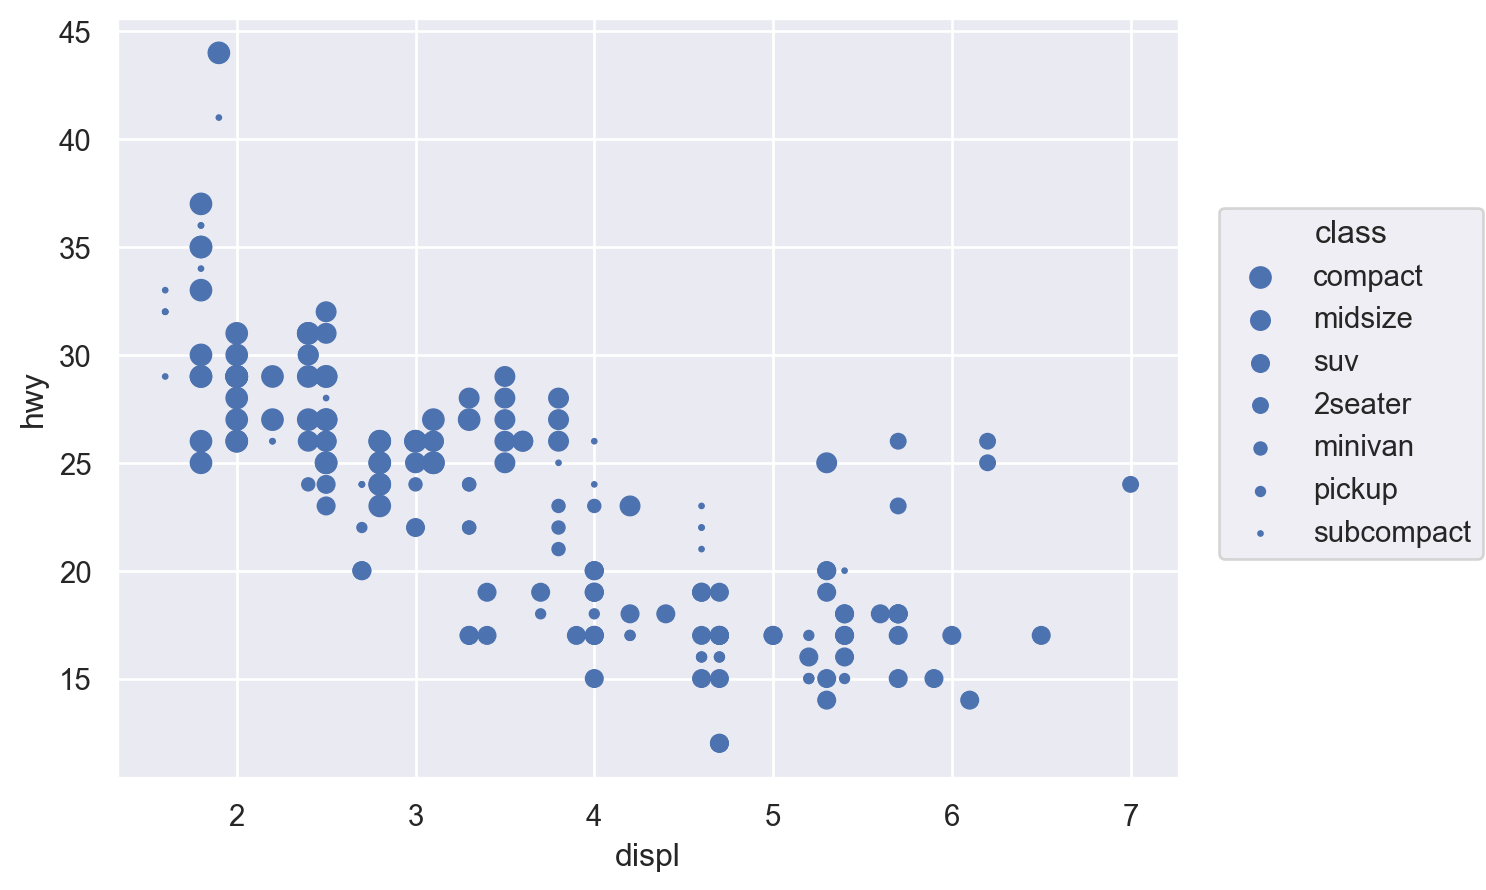

In [8]:
(
    so.Plot(mpg, x="displ", y="hwy", pointsize="class")
    .add(so.Dot())
)

### Marker

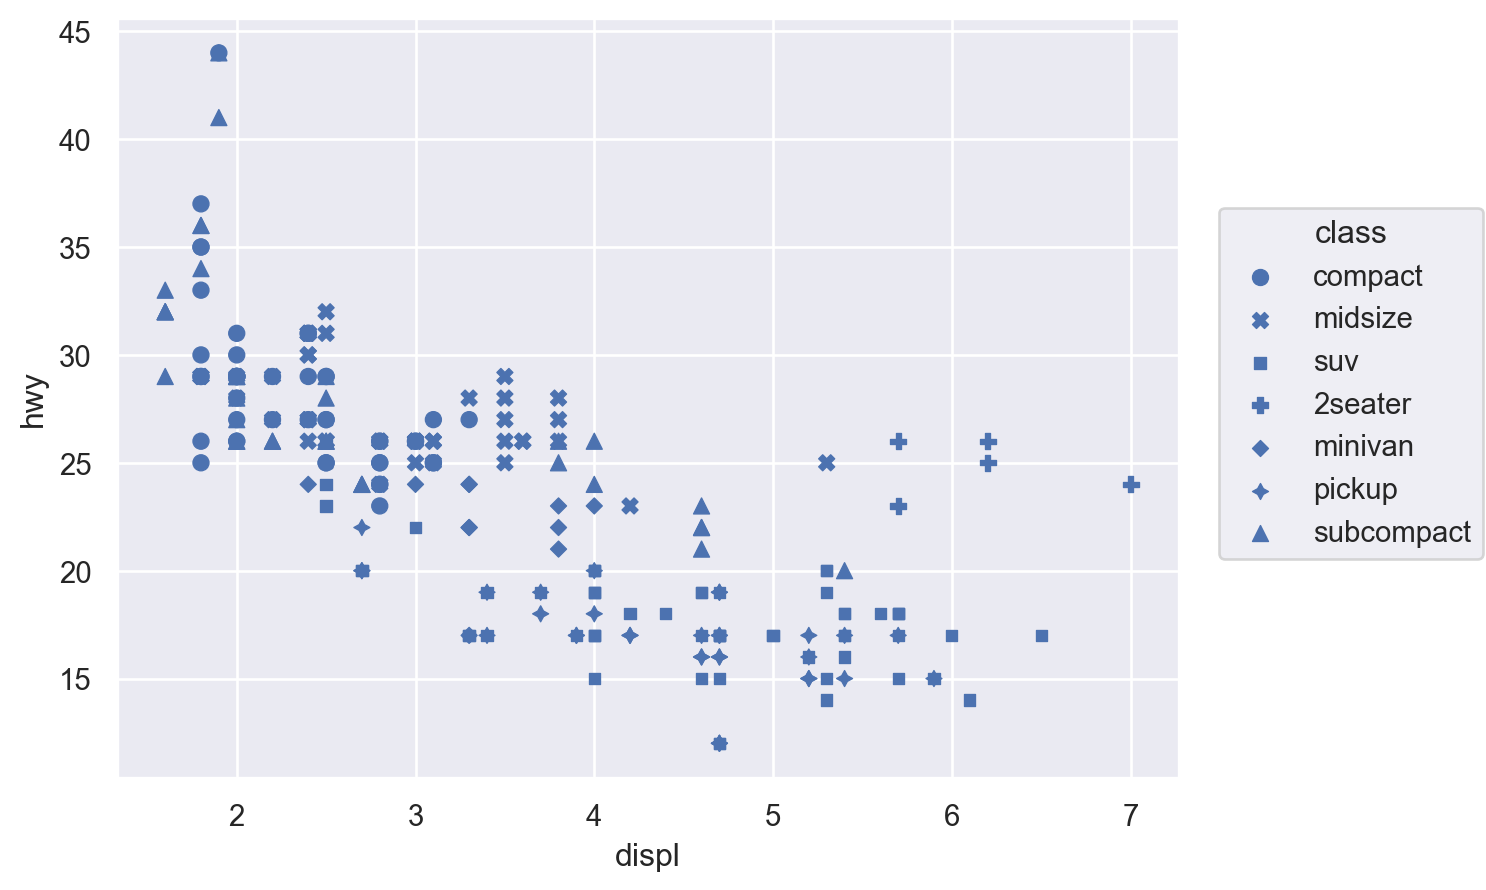

In [9]:
(
    so.Plot(mpg, x="displ", y="hwy", marker="class")
    .add(so.Dot())
)

### Alpha

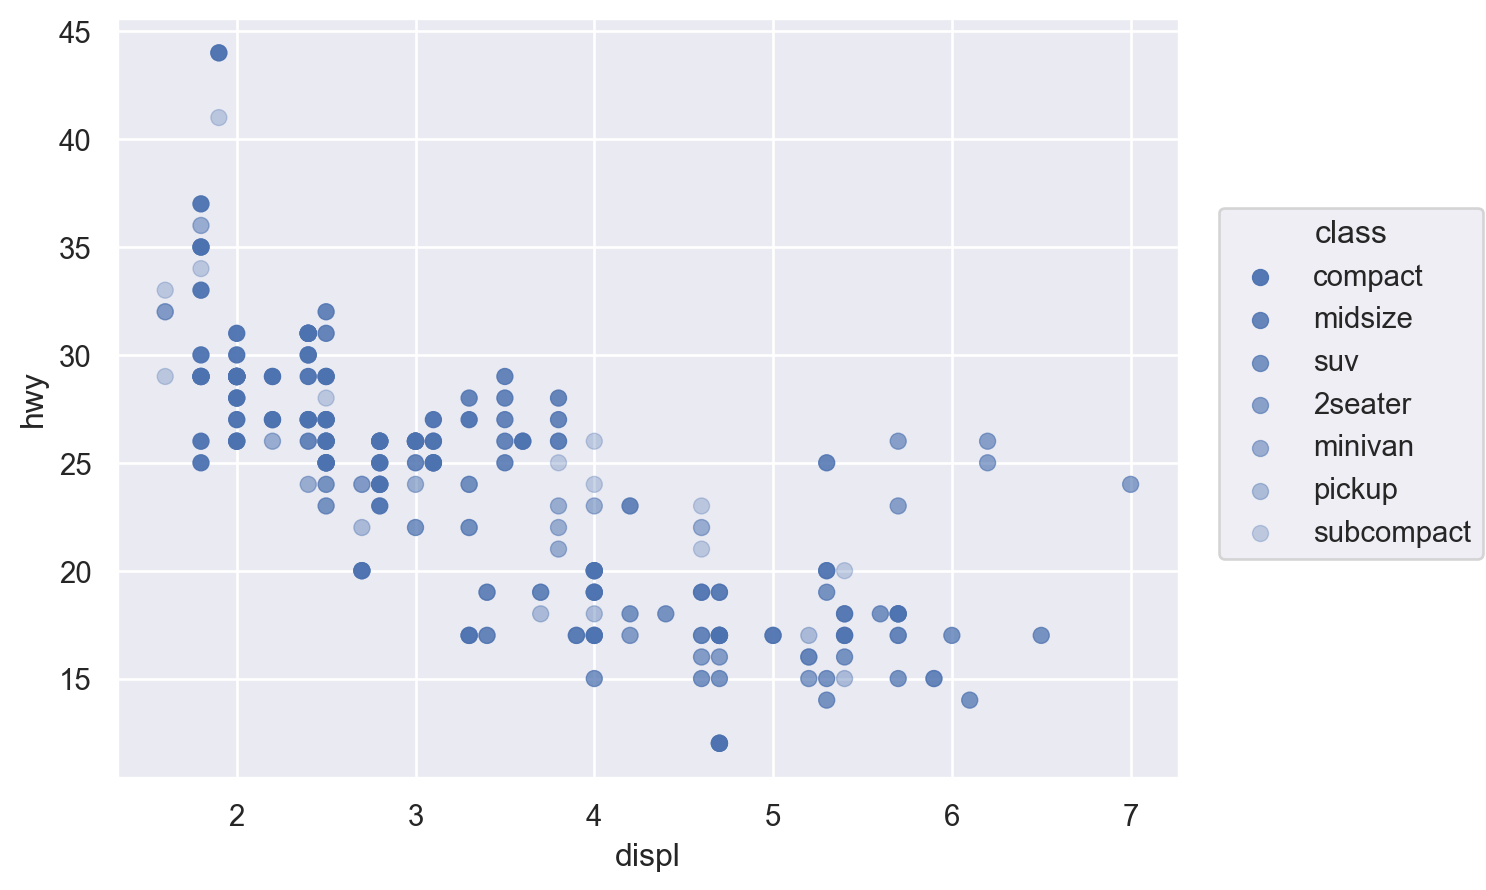

In [10]:
(
    so.Plot(mpg, x="displ", y="hwy", alpha="class")
    .add(so.Dot())
)

### Linestyle

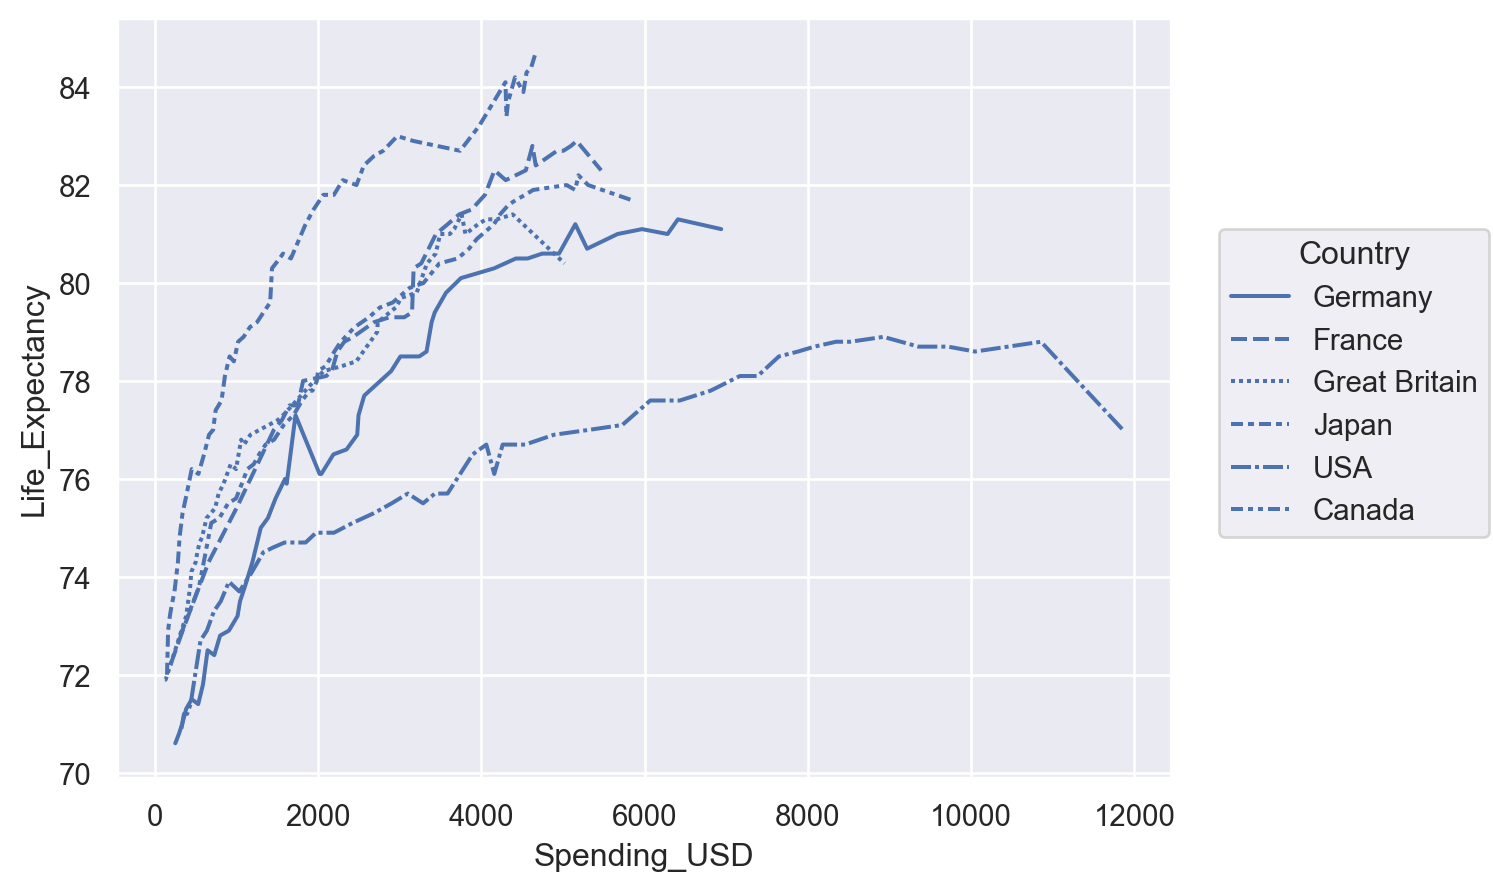

In [11]:
healthexp = sns.load_dataset("healthexp")

p = so.Plot(healthexp, x="Spending_USD", y="Life_Expectancy", linestyle="Country")
p.add(so.Line())

### 두 가지 이상의 속성
ex. color & marker

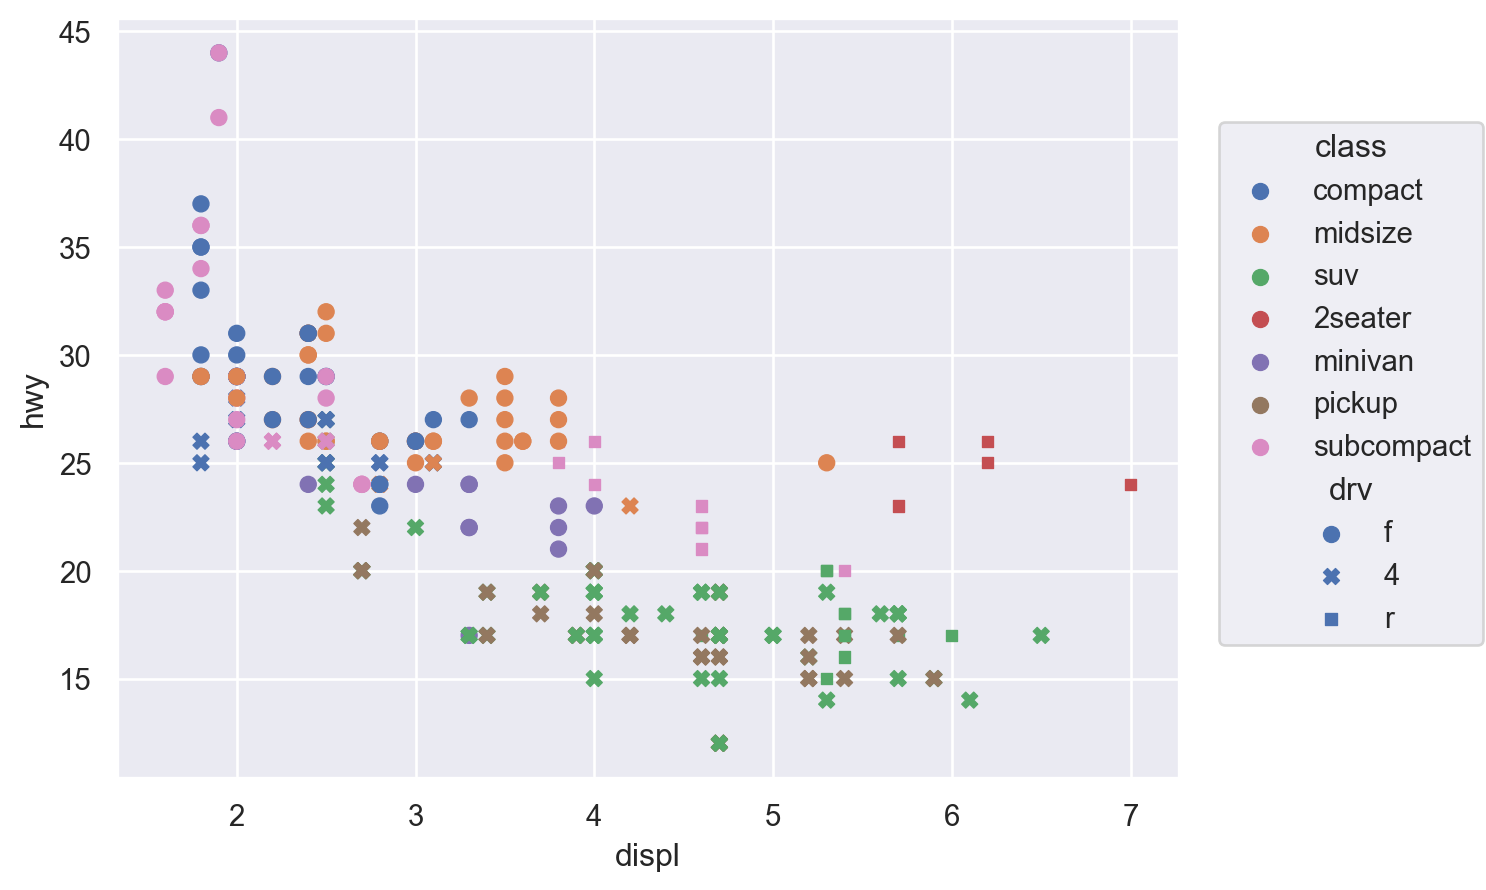

In [12]:
(
    so.Plot(mpg, x="displ", y="hwy", color="class", marker="drv")
    .add(so.Dot())
)

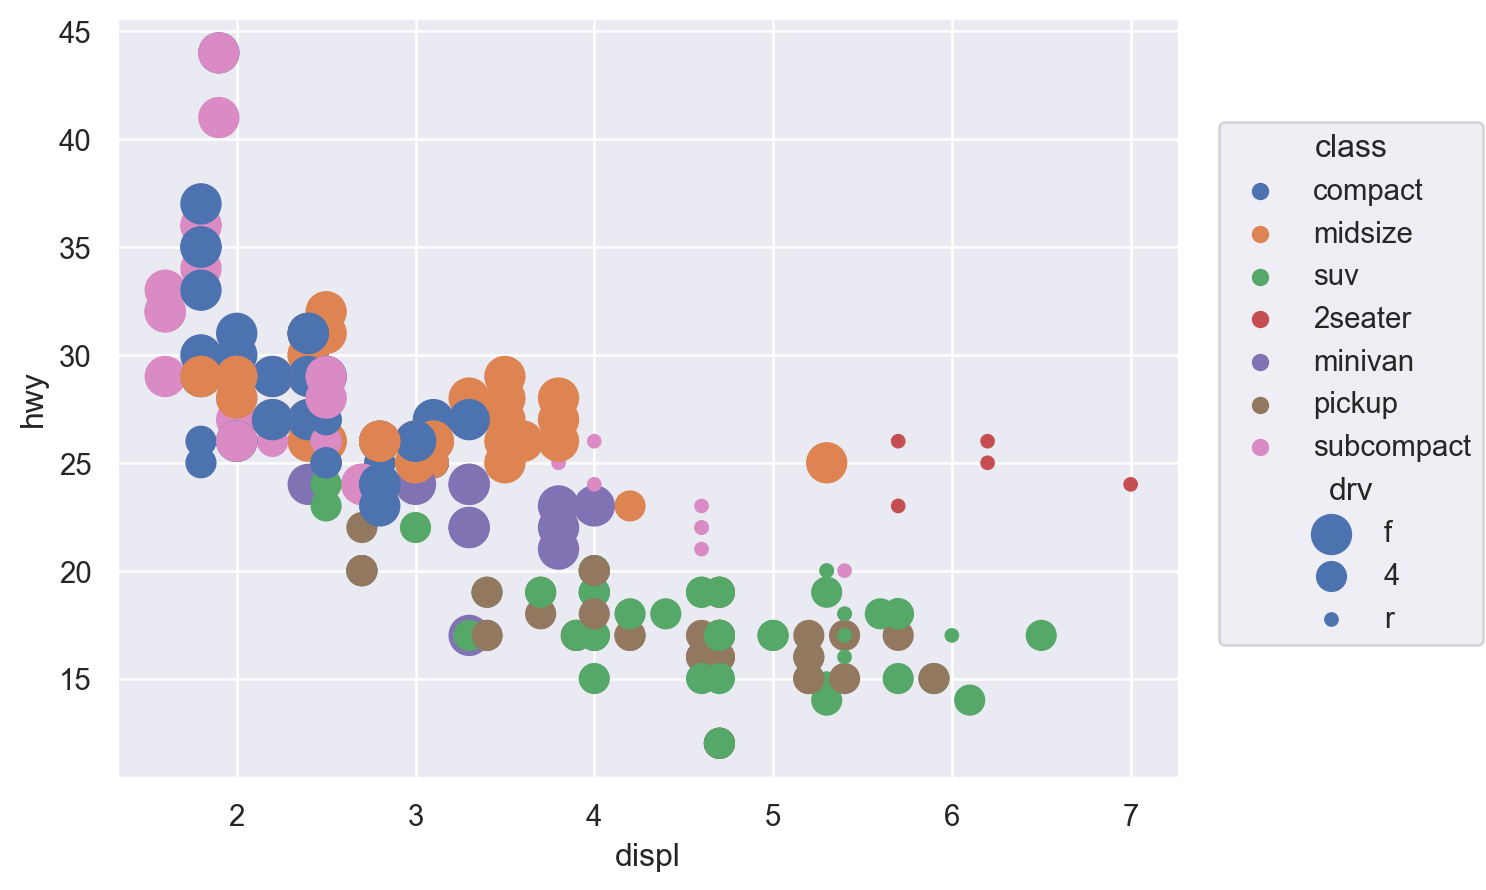

In [71]:
(
    so.Plot(mpg, x="displ", y="hwy", color="class", pointsize="drv")
    .add(so.Dot())
    .scale(pointsize=(5, 15)) # pointsize의 range설정
)

::: {.callout-important}

*어떤 속성을 어떤 변수에 할당하는 것이 적절한지를 선택하는 것이 기술*  
예를 들어, 아래 두 플랏은 동일한 정보를 품고 있으나, 시각적 인식에 큰 차이를 만듦

:::

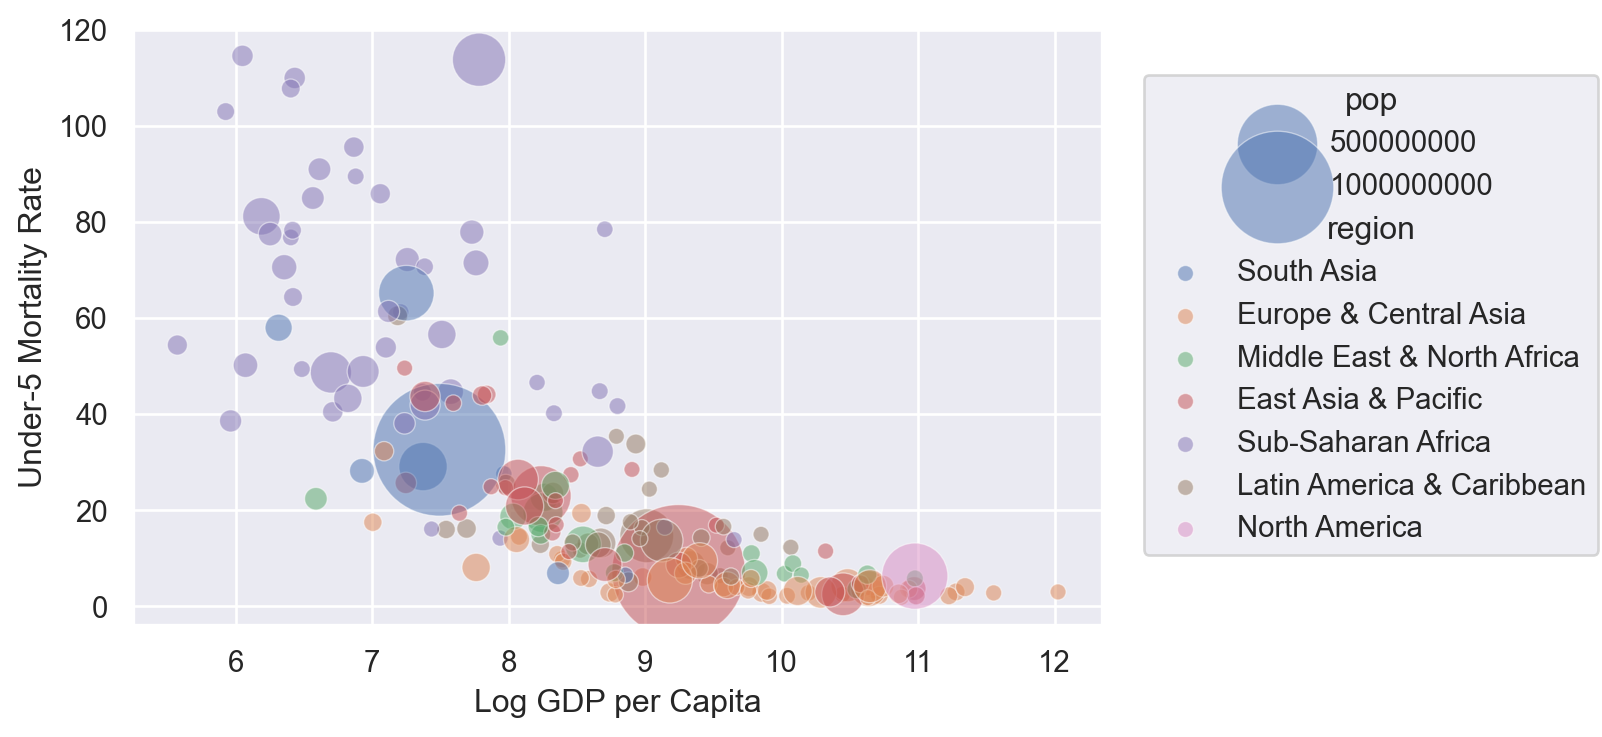

In [84]:
#| echo: false

wdi_2020 = pd.read_csv("data/wdi_2020.csv")
wdi_2020.head()

(
    so.Plot(wdi_2020, x="log_gdp", y="child_mortality")
    .add(so.Dot(edgecolor="white", alpha=.5), pointsize="pop", color="region")
    .scale(pointsize=(6, 50))
    .label(x="Log GDP per Capita", y="Under-5 Mortality Rate")
    .layout(size=(6, 4))
)

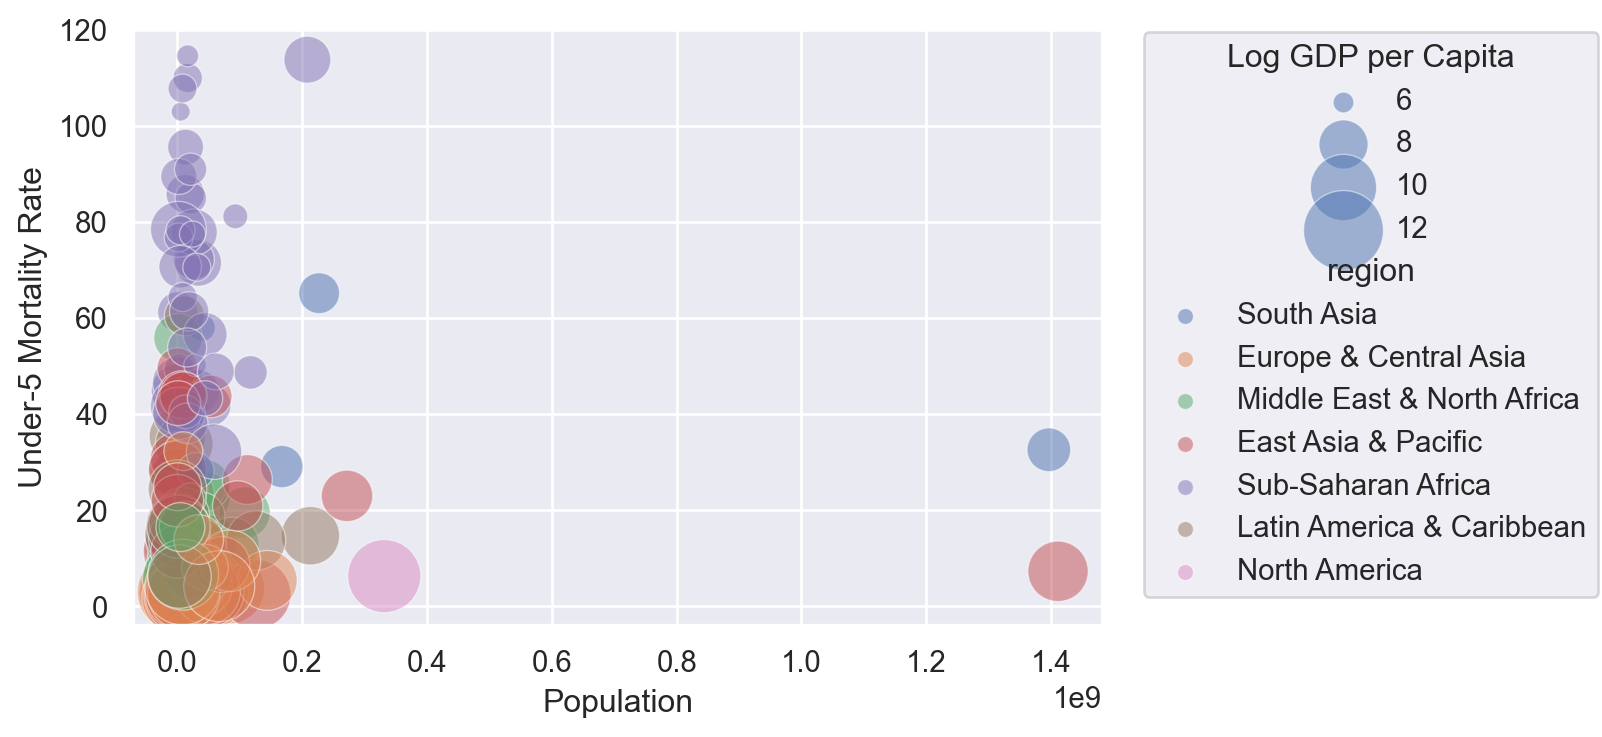

In [85]:
#| echo: false

(
    so.Plot(wdi_2020, x="pop", y="child_mortality")
    .add(so.Dot(edgecolor="white", alpha=.5), pointsize="log_gdp", color="region")
    .scale(pointsize=(1, 30))
    .label(x="Population", y="Under-5 Mortality Rate", pointsize="Log GDP per Capita")
    .layout(size=(6, 4))
)

연속 vs. 카테고리 변수 여부에 따라 다르게 작동

In [49]:
left = so.Plot(mpg, x="displ", y="hwy", color="class").add(so.Dot()).layout(engine="constrained")

right = so.Plot(mpg, x="displ", y="hwy", color="cty").add(so.Dot()).layout(engine="constrained")

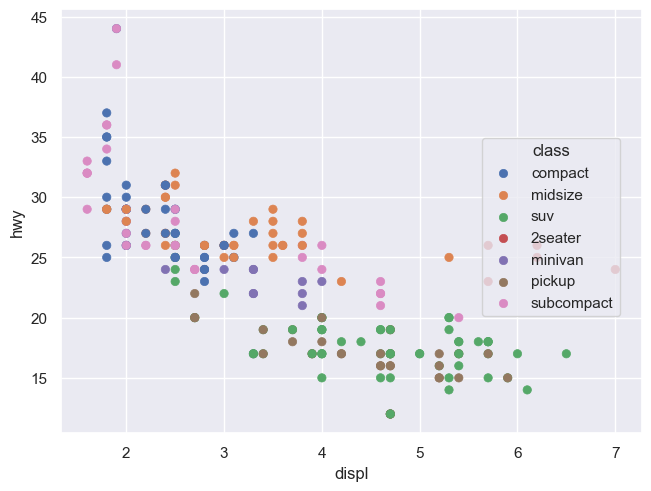

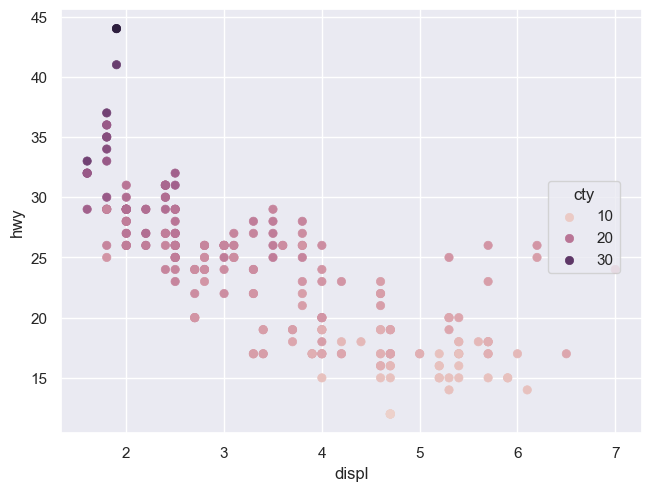

In [65]:
#| label: fig-charts
#| fig-cap: Categorical vs. Continuous
#| fig-subcap: 
#|   - "type of car"
#|   - "city miles per gallon"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()

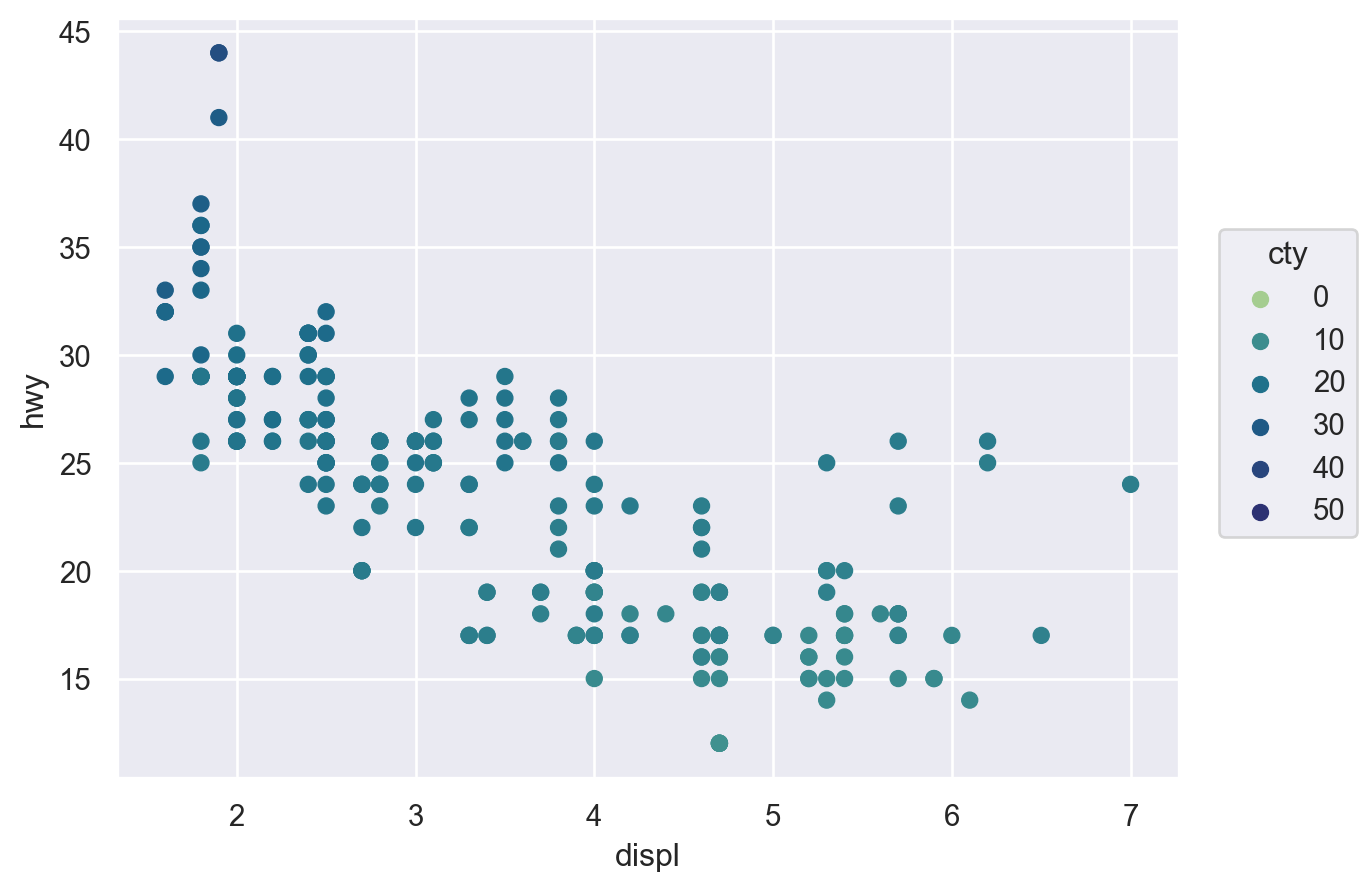

In [91]:
(
    so.Plot(mpg, x="displ", y="hwy", color="cty")
    .add(so.Dot())
    .scale(color=so.Continuous("crest", norm=(0, 50), trans="sqrt"))
)

## Setting properties

Setting properties vs. mapping properties (aesthetic)

**변수**에 속성을 할당하는 것이 아니라, graphical objects (Marks)의 속성을 지정

Marks (.Dot(), .Line(), .Bar(), ...)마다 설정할 수 있는 속성이 다름

주로 쓰이는 속성들: `color`, `pointsize`, `alpha`


> `.Dot()`의 경우  
> *class seaborn.objects.Dot(artist_kws=<factory>, marker=<'o'>, pointsize=<6>, stroke=<0.75>, color=<'C0'>, alpha=<1>, fill=<True>, edgecolor=<depend:color>, edgealpha=<depend:alpha>, edgewidth=<0.5>, edgestyle=<'-'>)*
>
> `.Dots()`의 경우  
> *class seaborn.objects.Dots(artist_kws=<factory>, marker=<rc:scatter.marker>, pointsize=<4>, stroke=<0.75>, color=<'C0'>, alpha=<1>, fill=<True>, fillcolor=<depend:color>, fillalpha=<0.2>)*
>
> [seaborn reference](https://seaborn.pydata.org/api.html)

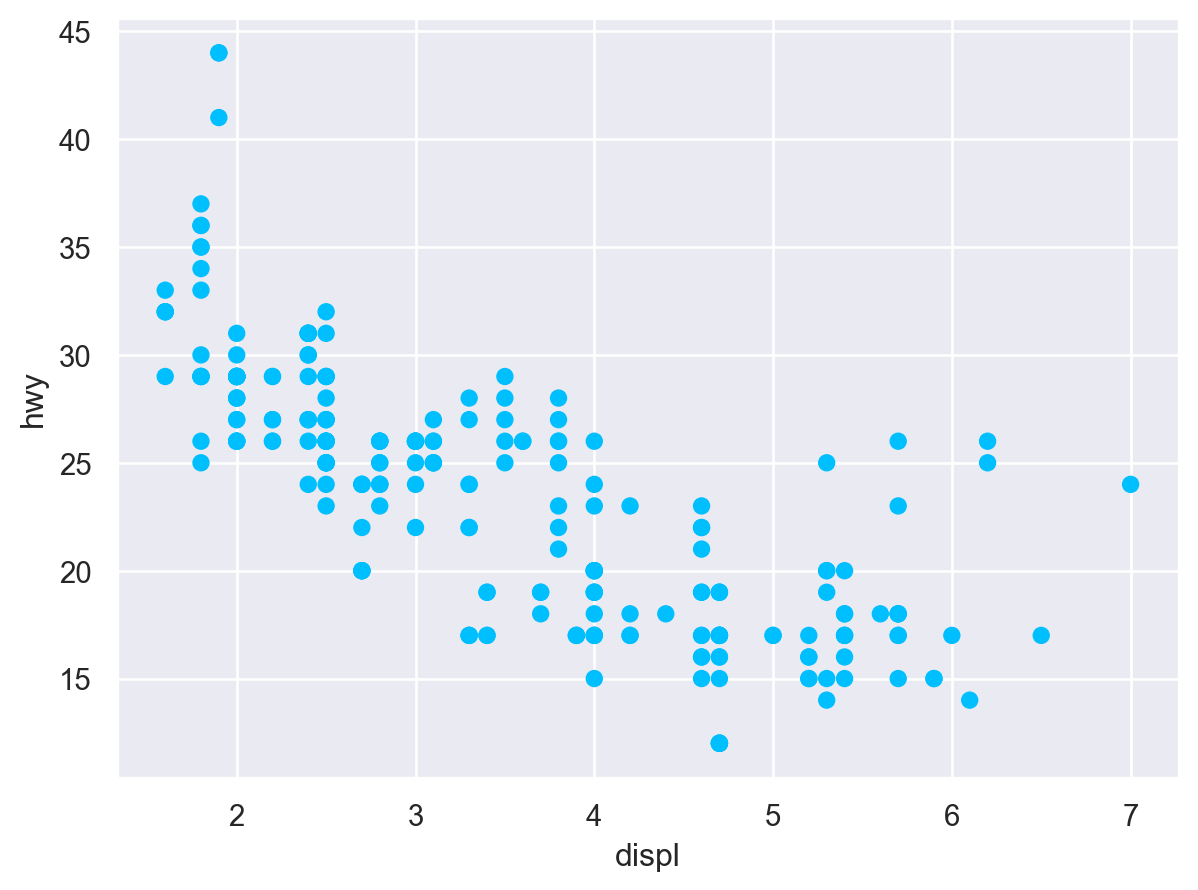

In [94]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(color="deepskyblue")) # Mark object 안에 지정!
)

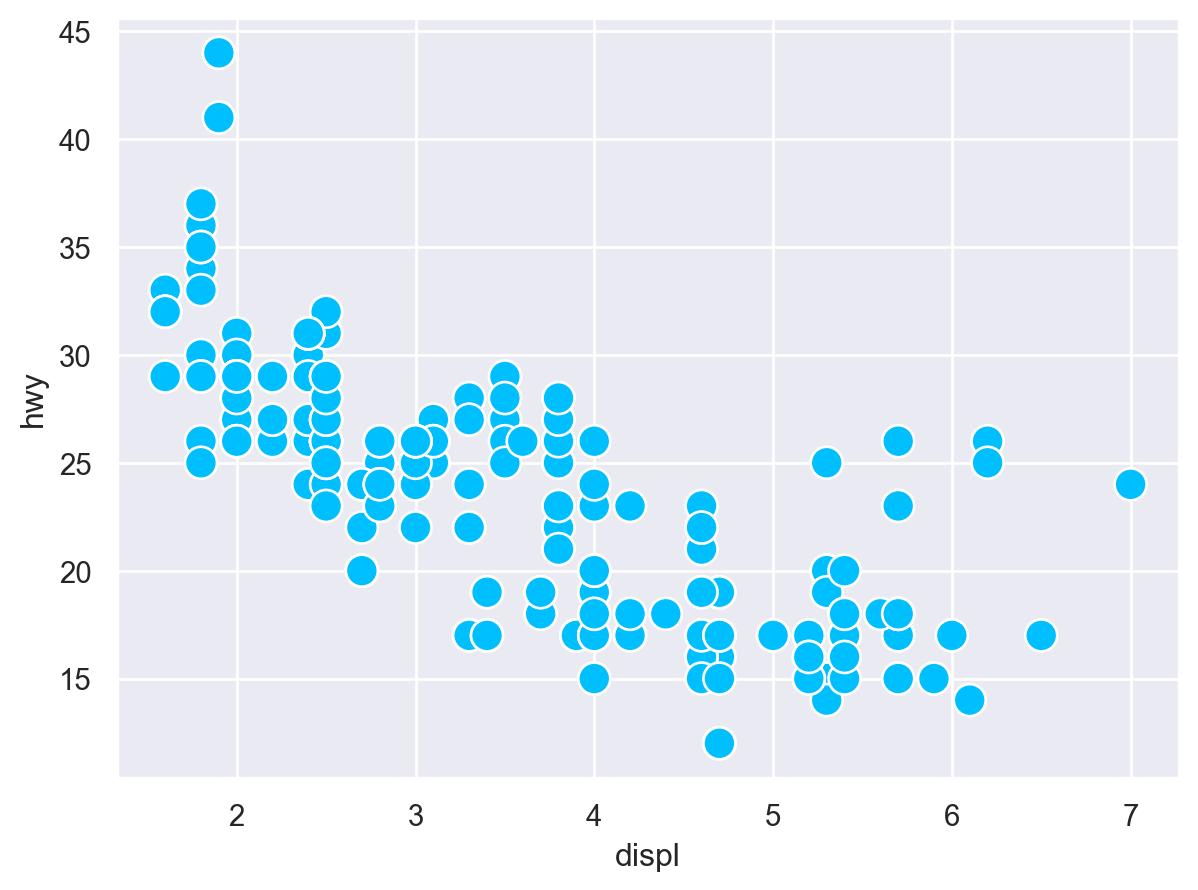

In [105]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(color="deepskyblue", pointsize=12, edgecolor="white", edgewidth=1)) # Mark object 안에 지정!
)

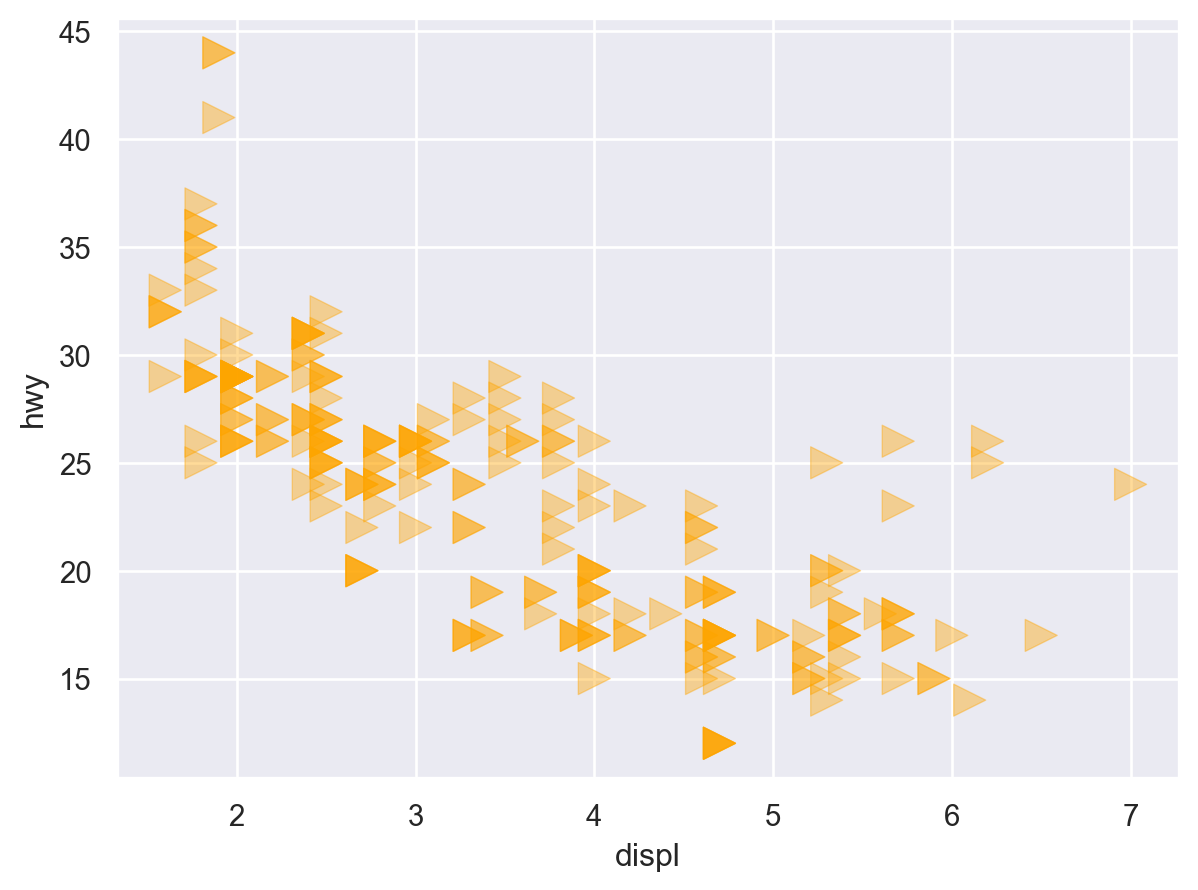

In [111]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(color="orange", pointsize=12, marker=">", alpha=.4)) # Mark object 안에 지정!
)

::: {.callout-tip}
다양한 Mark properties에 대해서는 홈페이지 참고  
[Properties of Mark objects](https://seaborn.pydata.org/tutorial/properties.html)
:::

## Facets

플랏을 여러 면으로 나누어 그리기

In [123]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


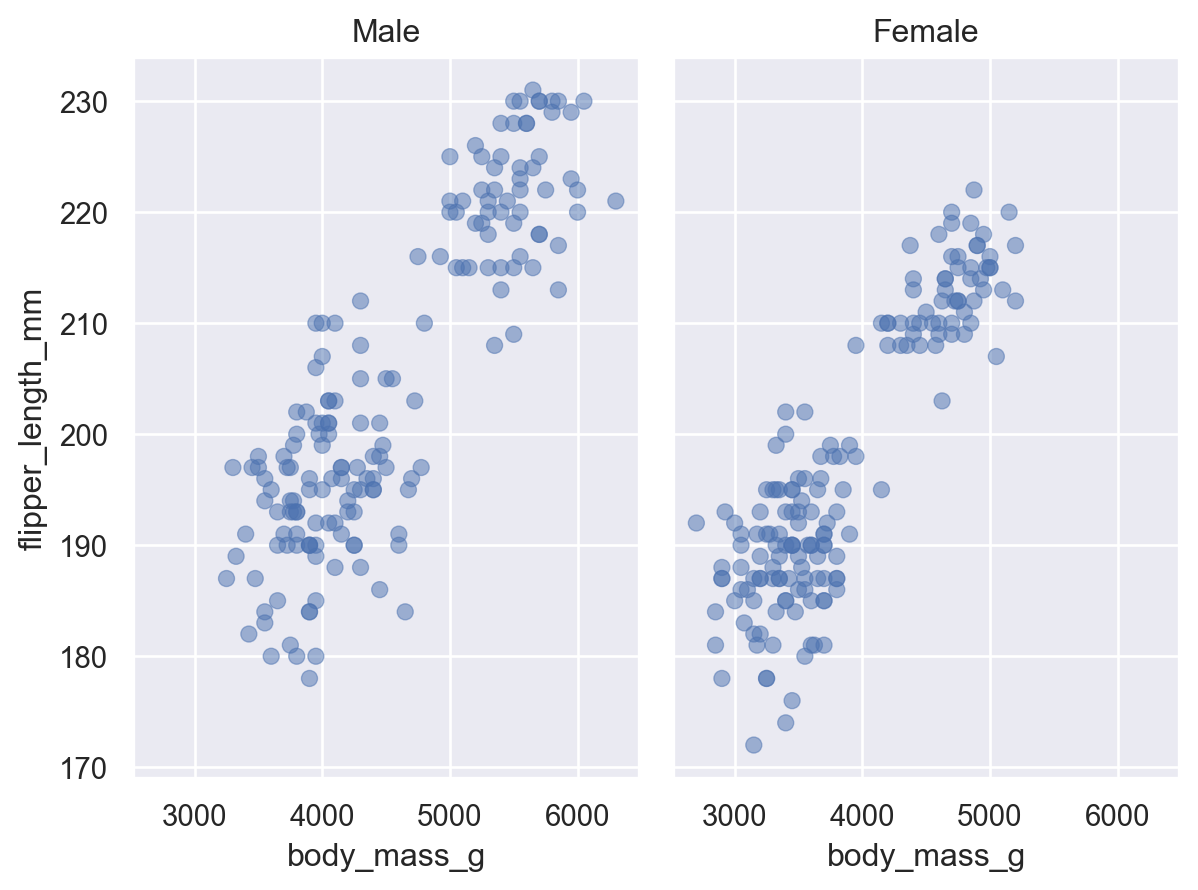

In [127]:
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet("sex") # 기본적으로 columns으로 나누어져 그림
    .add(so.Dot(alpha=.5))
)

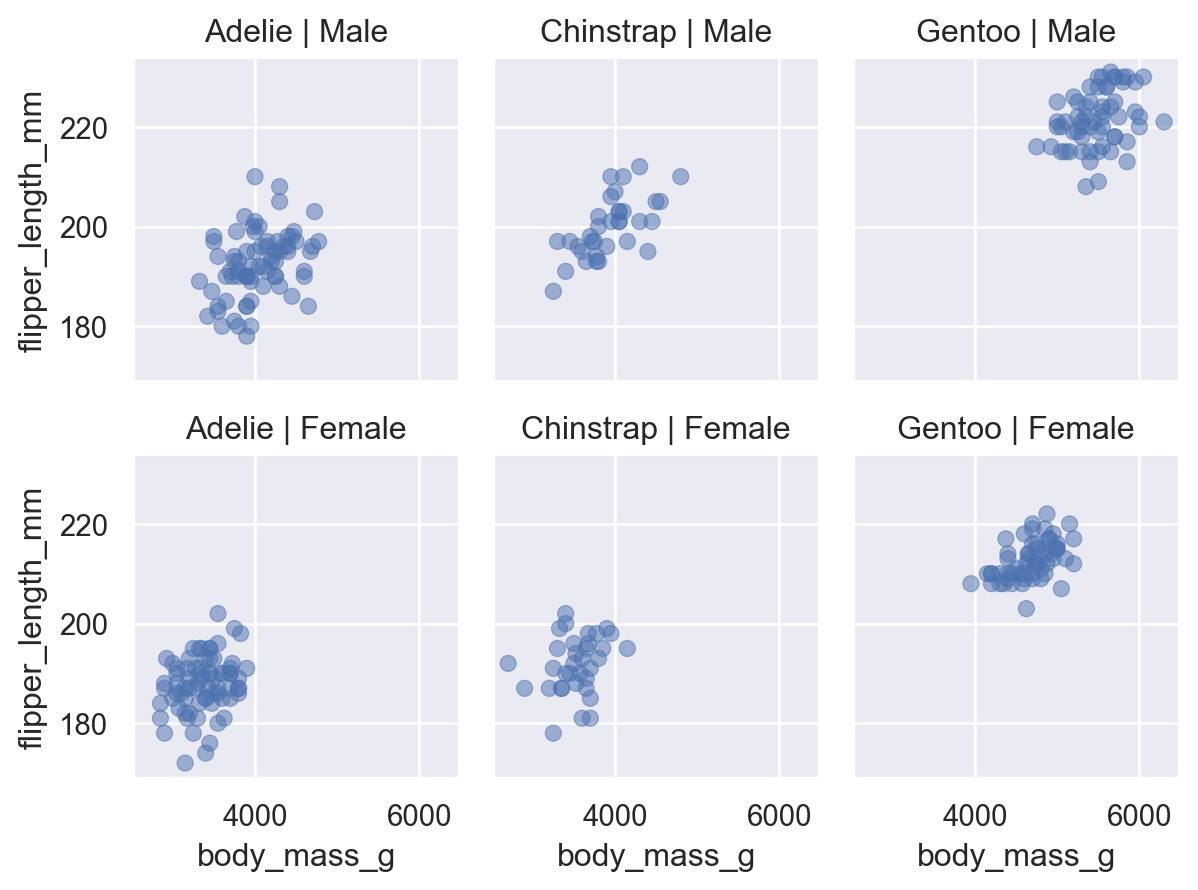

In [129]:
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Dot(alpha=.5))
)

::: {.callout-important}
Facet과 Color 중 어떤 방식으로 표현하는 것이 유리한가? 밸런스를 잘 선택!
:::

In [134]:
left = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(col="species")
    .add(so.Dot(alpha=.5))
)
right = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm", color="species")
    .add(so.Dot(alpha=.5))
)

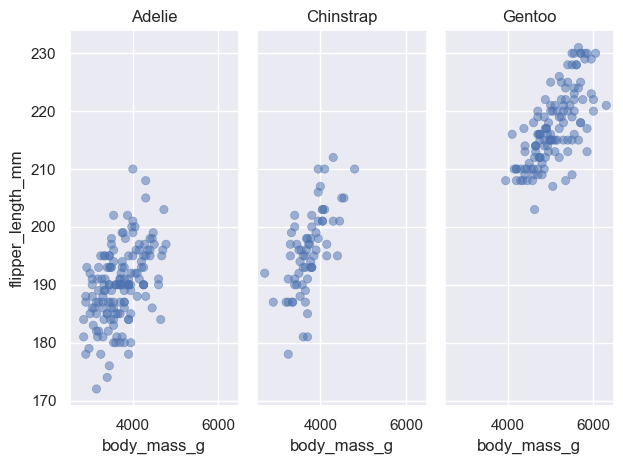

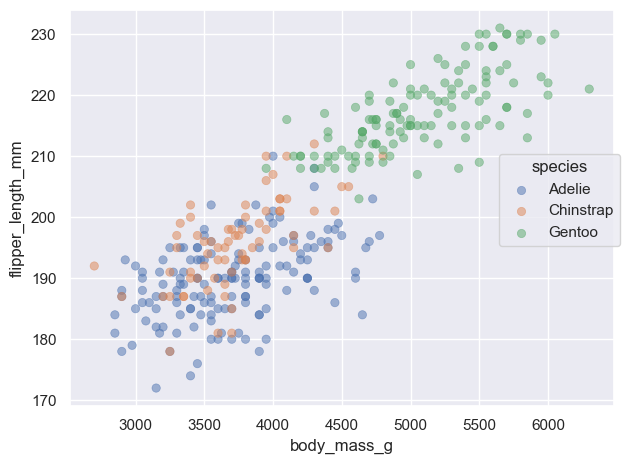

In [135]:
#| label: fig-charts2
#| fig-cap: faceting vs. color mapping
#| fig-subcap: 
#|   - "faceting"
#|   - "color mapping"
#| layout-ncol: 2
#| echo: false

left.show()
right.show()

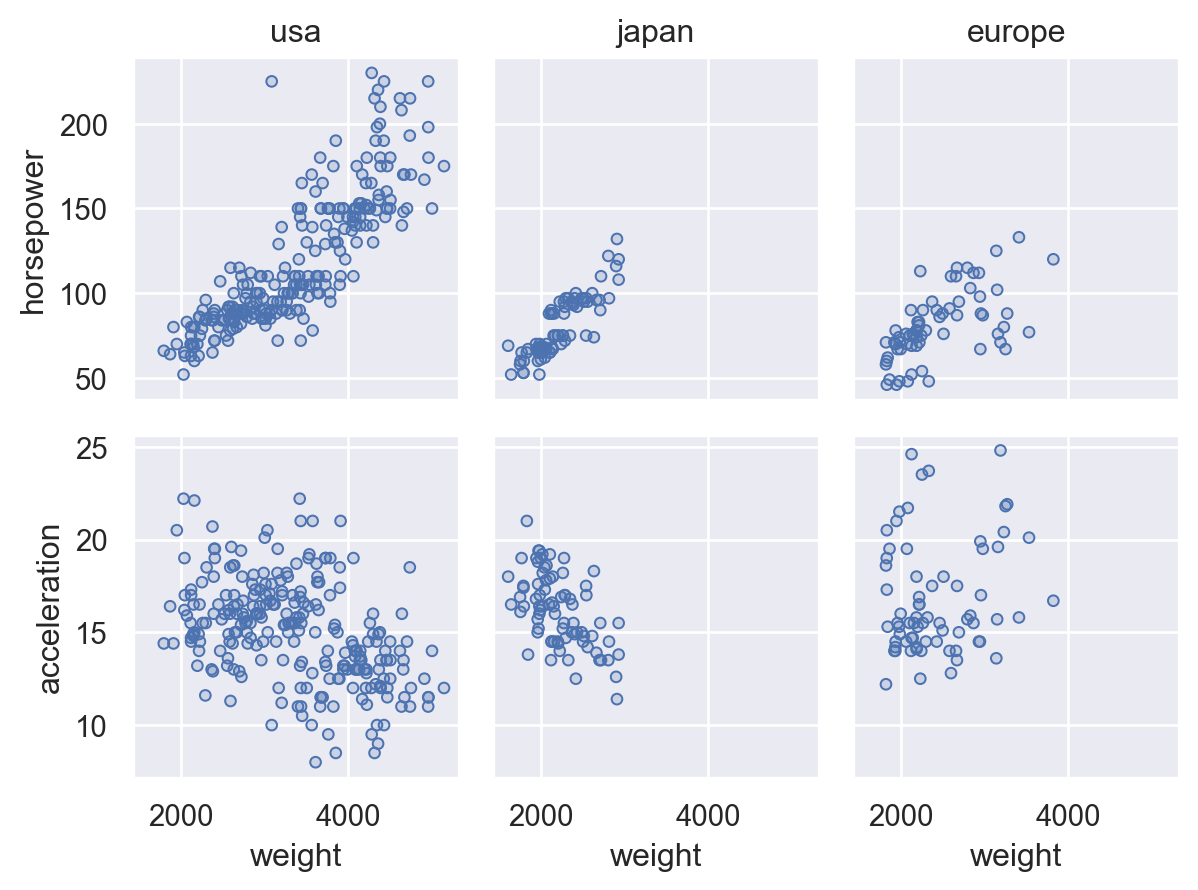

In [14]:
mpg2 = sns.load_dataset("mpg")
(
    so.Plot(mpg2, x="weight")
    .pair(y=["horsepower", "acceleration"])
    .facet(col="origin")
    .add(so.Dots())
)

### Overploting

### Adding multiple layers

![](images/mapping.png){width=300}

## Layer-specific mappings

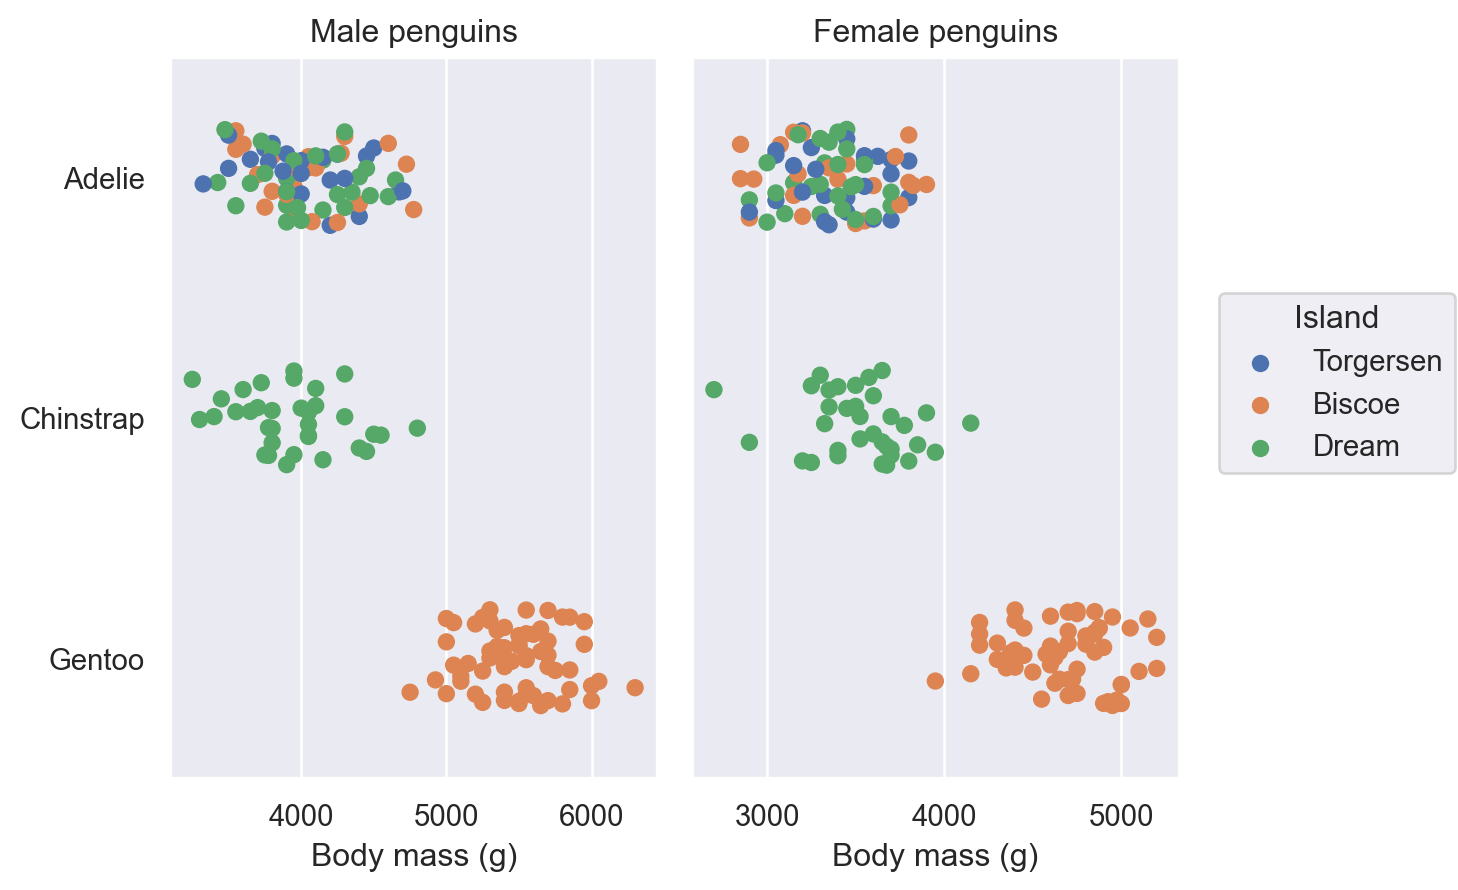

In [15]:
penguins = sns.load_dataset("penguins")

(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
    )
)

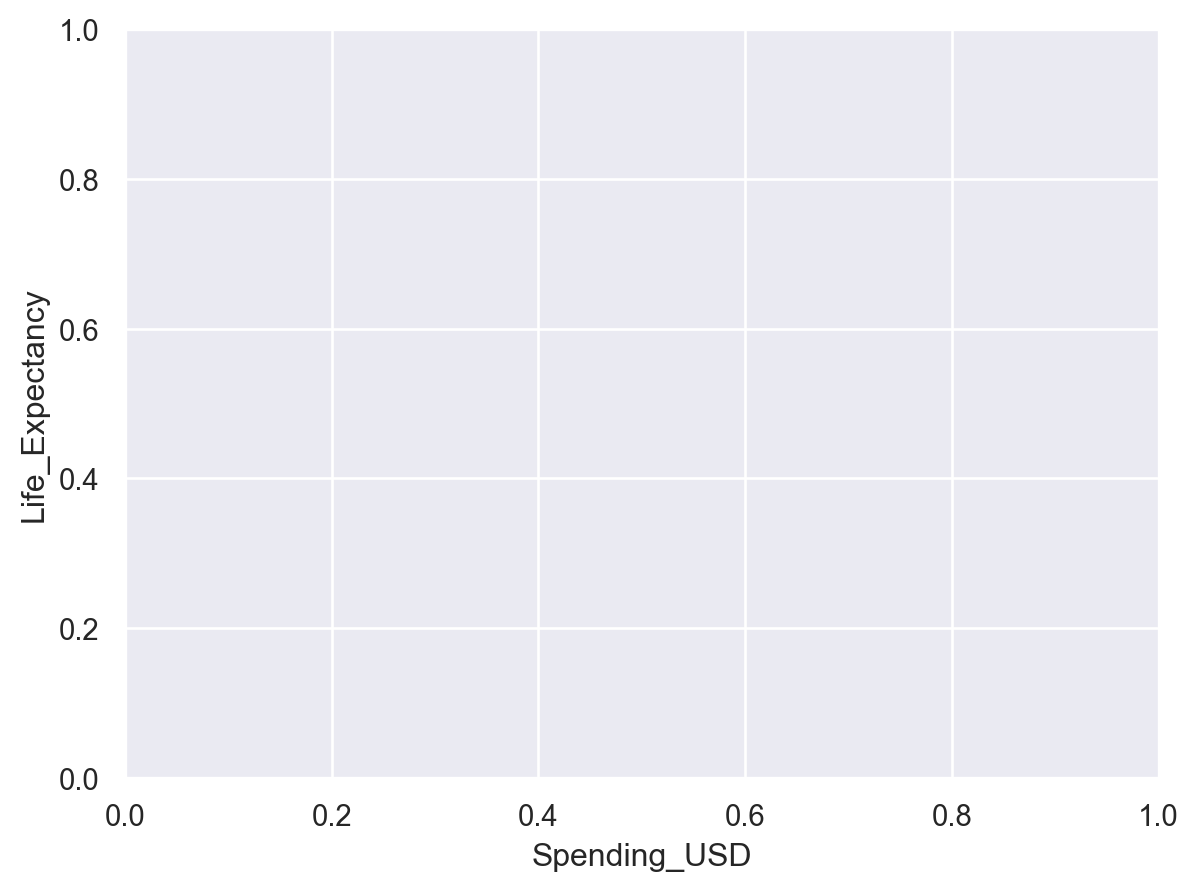

In [16]:
p.save("filename.png")